### Red Wine Quality Project

### 1. Import important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

### 2. Import data set

#### a) Data Frame

In [2]:
rwq = pd.read_csv(r'C:/Users/Rohit Kachhal/Data Science Program/Project Phase/winequality-red.csv')
rwq

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#### b) Data Frame Shape

In [3]:
rwq.shape

(1599, 12)

#### c) Data Frame Info

In [4]:
rwq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### Observation
* 1. All column except 'quality' are type of float. 'quality' is only the type of int.
* 2. There is no null value in data set

#### d) Cross check the null value

In [5]:
rwq.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### There is no null value

### 3.Correlation matrix to see the coffecient of multicolinearity

#### a). Correlation matrix is in form of data frame

In [6]:
rwq_corr = rwq.corr().abs()
rwq_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.256131,0.671703,0.114777,0.093705,0.153794,0.113181,0.668047,0.682978,0.183006,0.061668,0.124052
volatile acidity,0.256131,1.000000,0.552496,0.001918,0.061298,0.010504,0.076470,0.022026,0.234937,0.260987,0.202288,0.390558
citric acid,0.671703,0.552496,1.000000,0.143577,0.203823,0.060978,0.035533,0.364947,0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,0.265026,0.371260,0.221141,0.128907
free sulfur dioxide,0.153794,0.010504,0.060978,0.187049,0.005562,1.000000,0.667666,0.021946,0.070377,0.051658,0.069408,0.050656
total sulfur dioxide,0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,0.066495,0.042947,0.205654,0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,0.021946,0.071269,1.000000,0.341699,0.148506,0.496180,0.174919
pH,0.682978,0.234937,0.541904,0.085652,0.265026,0.070377,0.066495,0.341699,1.000000,0.196648,0.205633,0.057731
sulphates,0.183006,0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,0.196648,1.000000,0.093595,0.251397


#### b). Visualize Correlation matrix using heatmap 

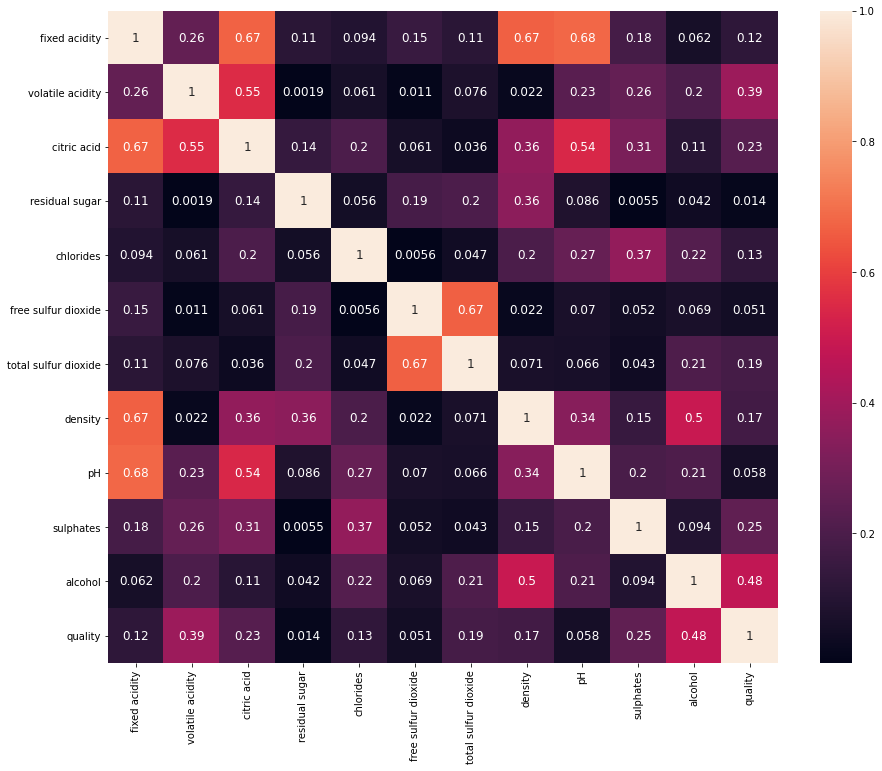

In [7]:
plt.figure(figsize=(15,12))
sns.heatmap(rwq_corr,annot=True,annot_kws={'size':12})
plt.show()

#### Outcome of Correlation

All the columns of dataset are positively correlaated with the target column.

1. alcohol has 48 percentage correlation with target column which can be considered as strong bond.
2. volatile acidity has 39 percentage correlation with target column which can be considered as strong bond.
3. sulphates has 25 percentage correlation with target column which can be considered as good bond.
4. citric acid has 23 percentage correlation with target column which can be considered as good bond.
5. total sulfur dioxide has 19 percentage correlation with target column which can be considered as good bond.
6. density has 17 percentage correlation with target column which can be considered as good bond.
7. chlorides has 13 percentage correlation with target column which can be considered as good bond.
8. fixed acidity has 12 percentage correlation with target column which can be considered as good bond.
9. pH has 5.8 percentage correlation with target column which can be considered as weak bond.
10. free sulfur dioxide has 5.1 percentage correlation with target column which can be considered as weak bond.
11. residual sugar has 1.4 percentage correlation with target column which can be considered as weak bond.

Max Correlation : alcohol

Min Correlation : residual sugar

### 4. Describe the data

In [8]:
rwq.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Visualize the describe data

<AxesSubplot:>

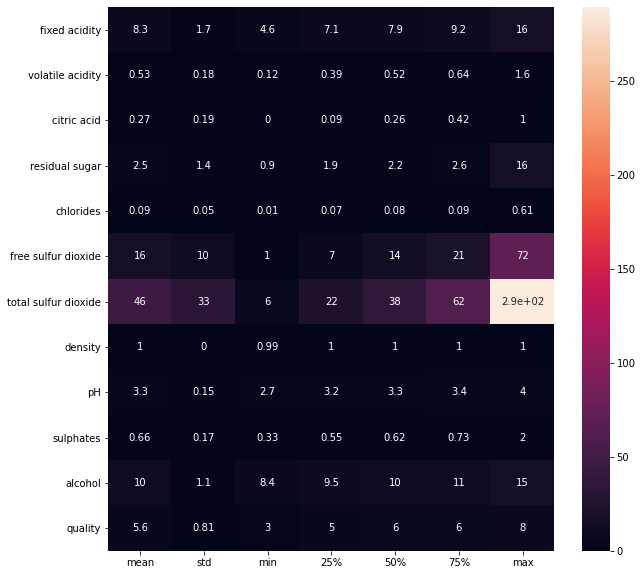

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(round(rwq.describe()[1:].transpose(),2),annot=True)

### 5. Checking whether data is distributrd normally

#### a) finding the skewness

In [10]:
rwq.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

#### b) Another way to finding skewness or outlier's

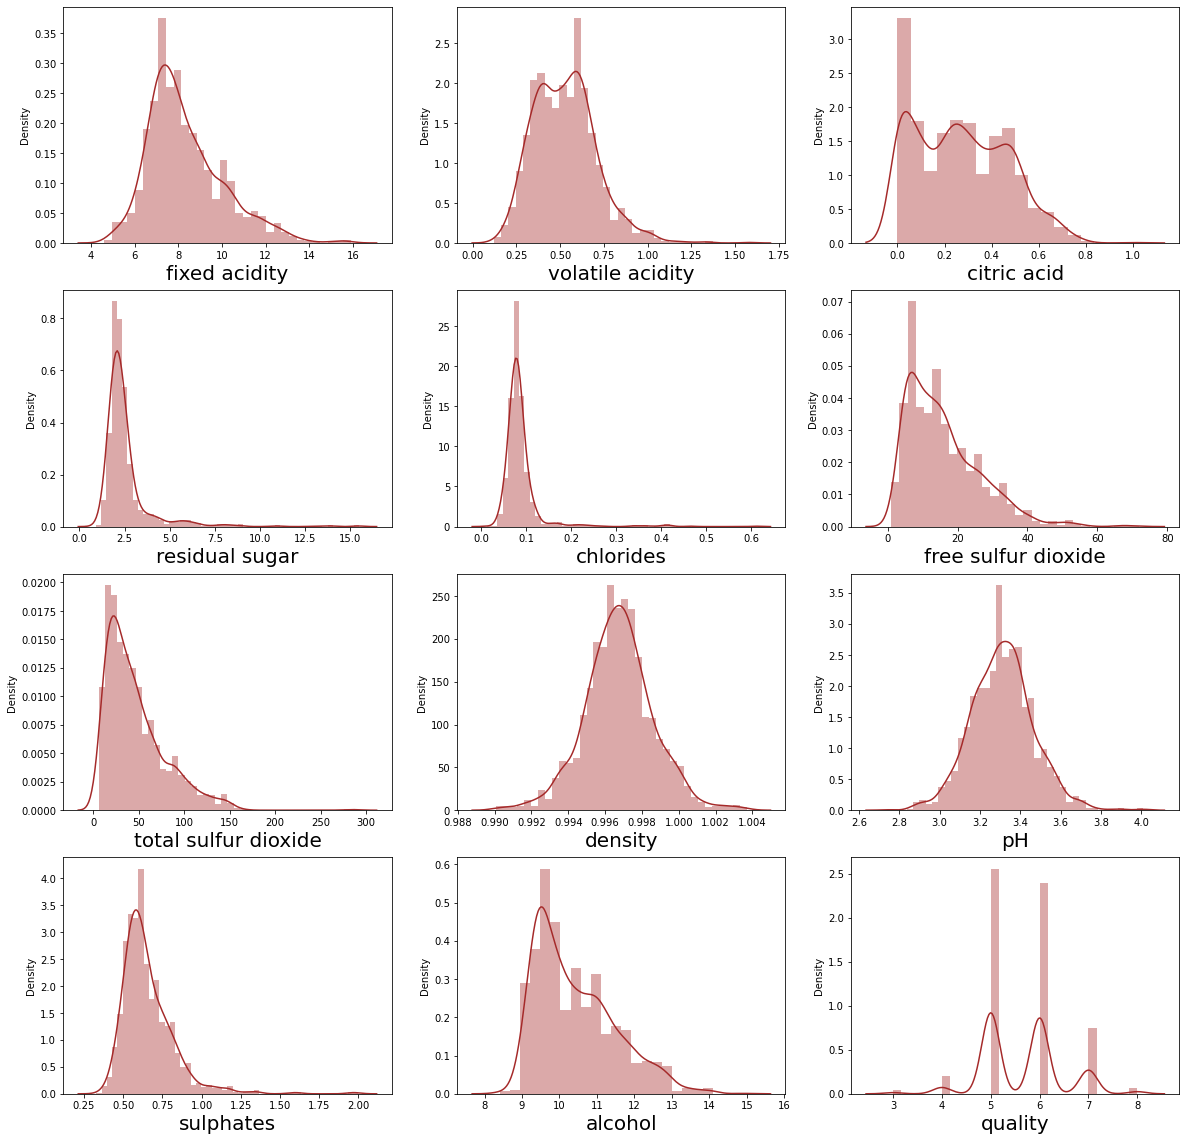

In [11]:
plt.figure(figsize=(20,20))
plot_number = 1
for col in rwq:
    if plot_number<=12:
        ax = plt.subplot(4,3,plot_number)   # plot is distributed in 4 row & 3 column
        sns.distplot(rwq[col],color='brown')           # plot displot for col which have all rwq column         
        plt.xlabel(col,fontsize = 20)
        
              
    plot_number+=1                           #increase plotnumber value by 1  
plt.show()

#### Outcomes :
1. As 'quality' is our target variable as per problem statement.
2. 'quality' have most data point in 5,6 & 7 category,less data point in 3,4 & 8 category & none in the 1,2 & 10 category.
3. Except target variable all features have skewness.

#### c) Speparating the target variable

In [12]:
rwq_features = rwq.drop(columns='quality',axis=1)

#### d) Plot the box plot to see outlier's 

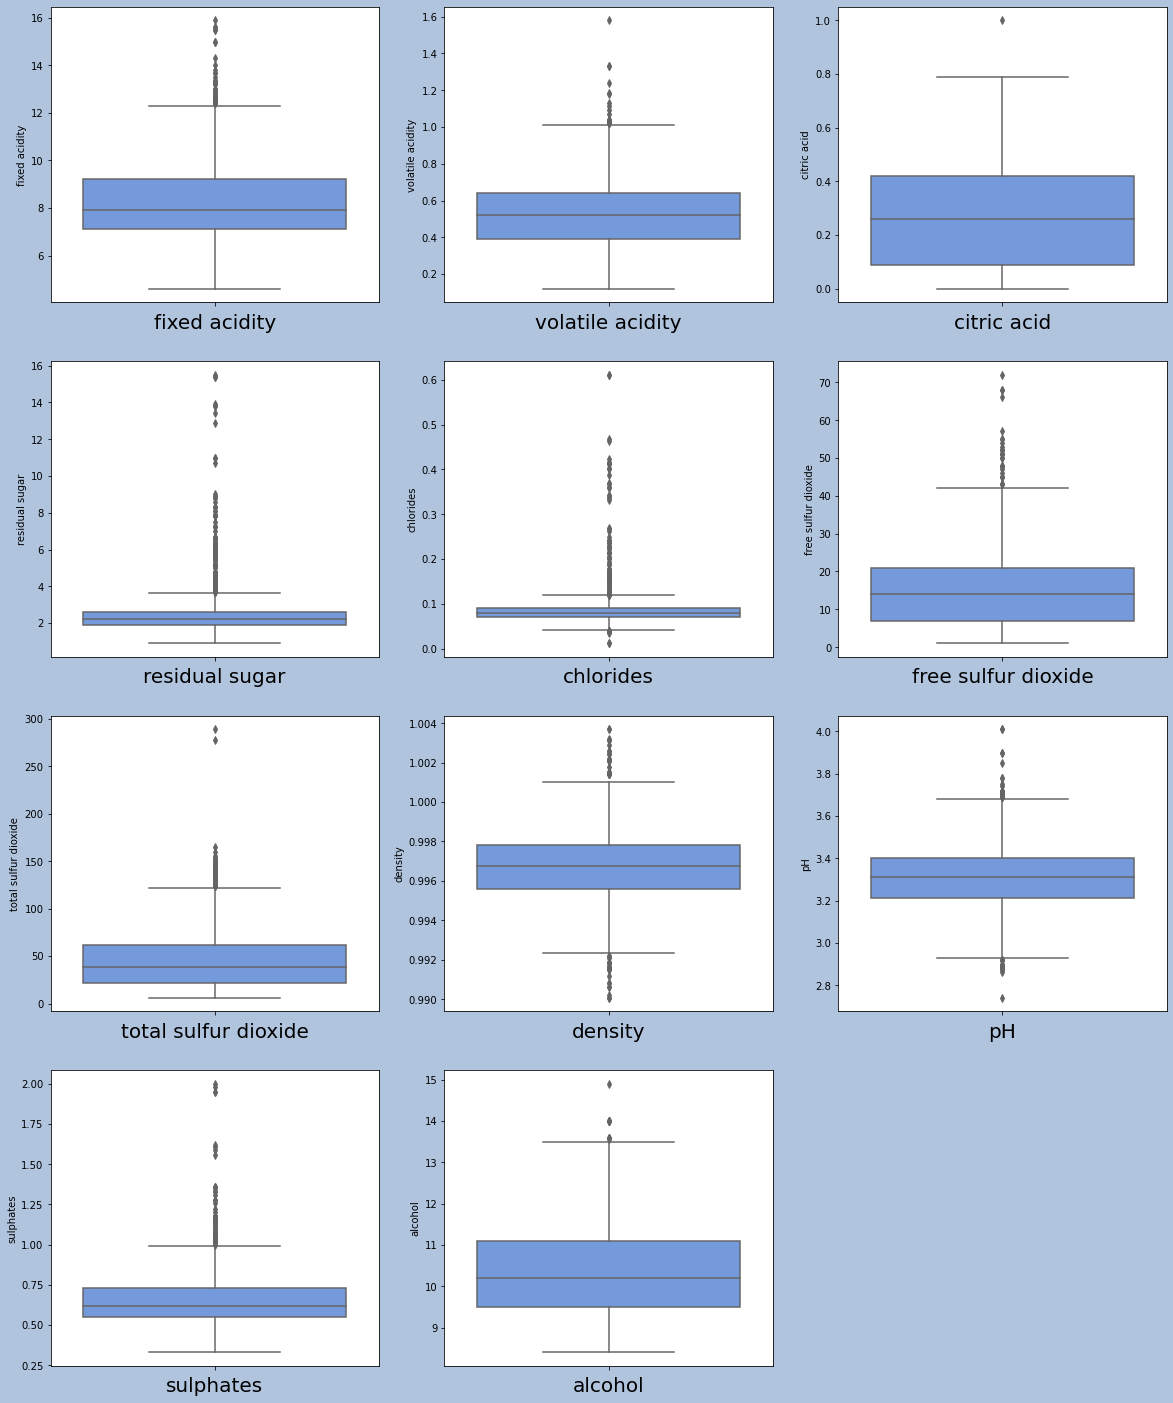

In [13]:
plt.figure(figsize=(20,25),facecolor='LightsteelBlue')
graph = 1

for colu in rwq_features:
    if graph<=30:
        ax = plt.subplot(4,3,graph)
        sns.boxplot(y=rwq_features[colu],color='Cornflowerblue')
        plt.xlabel(colu,fontsize = 20)
        
    graph+=1
plt.show() 

#### Outcome : All features have outlier's

#### e) Dealing with outlier's using Z score 

In [14]:
# using std as 3
# zscore is available in scipy.stats
# formula of zscore is : (x-mean)/std

from scipy.stats import zscore

z_score = zscore(rwq[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                      'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                      'pH', 'sulphates', 'alcohol']])
abs_z_score = np.abs(z_score)

filter_entry = (abs_z_score<3).all(axis=1)

rwq = rwq[filter_entry]
rwq

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#### f) Describe data again

In [15]:
rwq.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,8.312551,0.524050,0.265281,2.388717,0.081531,15.089849,43.660494,0.996718,3.316152,0.642414,10.417798,5.646776
std,1.647635,0.169451,0.191271,0.865307,0.021218,9.317669,29.414615,0.001718,0.141052,0.129753,1.021649,0.801119
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.996700,3.315000,0.620000,10.200000,6.000000
75%,9.200000,0.635000,0.420000,2.600000,0.089000,21.000000,58.000000,0.997800,3.400000,0.720000,11.100000,6.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,47.000000,145.000000,1.002200,3.750000,1.160000,13.600000,8.000000


#### g) Plot distribution plot again to see the distribution of data

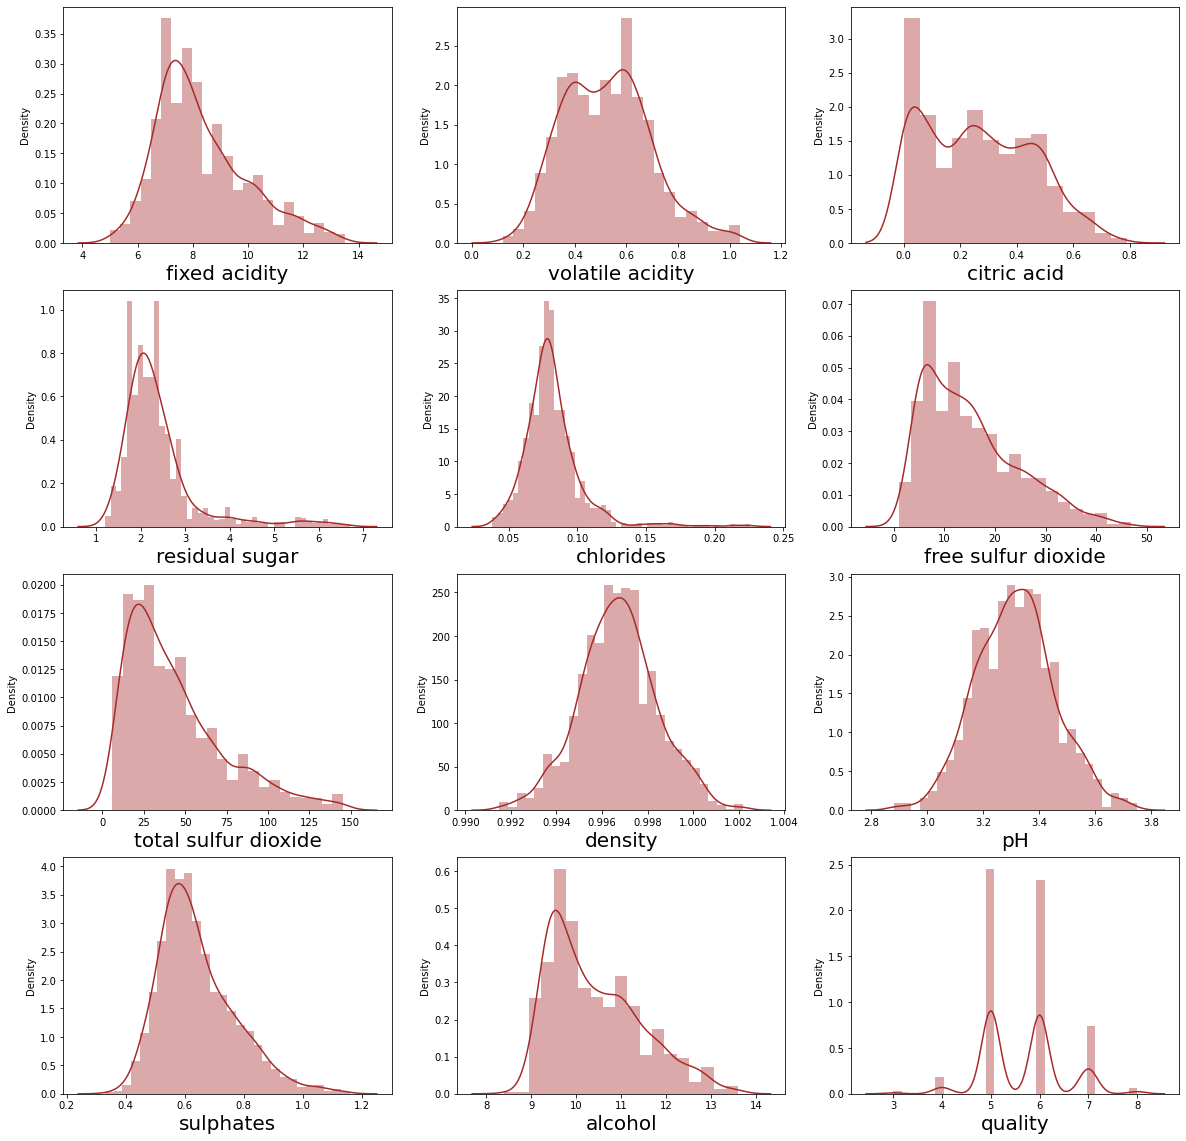

In [16]:
plt.figure(figsize=(20,20))
plot_number = 1
for col in rwq:
    if plot_number<=12:
        ax = plt.subplot(4,3,plot_number)   # plot is distributed in 4 row & 3 column
        sns.distplot(rwq[col],color='brown')           # plot displot for col which have all rwq column         
        plt.xlabel(col,fontsize = 20)
        
              
    plot_number+=1                           #increase plotnumber value by 1  
plt.show()

#### Outcome :
1. Quality have most value in [5,6] & 7 category, less value in [3,4] & 8 category, none value in [1,2] & 10 category.
2. 'fixed acidity','volatile acidity','citric acid' look like symmetric now.
3. 'residual sugar' after removing outlier's still skewness.
4. Some features like 'free sulfur dioxide','density' etc have still few outlier's
5. 'alcohol' distribution look like not normal but no outlier is there 

#### h) Checking the percentage of loss in data after removing outlier's

In [17]:
loss_data = (1599-1458)/1599*100
print("The loss of data after removing outlier's is :",loss_data)

The loss of data after removing outlier's is : 8.818011257035648


### 6. Selecting the independent variable as X and dependent variable as y

In [18]:
X = rwq.drop(columns='quality',axis=1)
y = rwq['quality']

In [19]:
print('The shape of X is :',X.shape)
print('The shape of y is :',y.shape)

The shape of X is : (1458, 11)
The shape of y is : (1458,)


In [20]:
from sklearn.preprocessing import power_transform

In [21]:
X = power_transform(X, method='yeo-johnson')
X

array([[-0.46910218,  1.04577542, -1.52186998, ...,  1.35995444,
        -0.58823037, -1.11232895],
       [-0.17212704,  1.90240432, -1.52186998, ..., -0.81842137,
         0.45352708, -0.52685366],
       [-0.17212704,  1.34481498, -1.24278981, ..., -0.38286787,
         0.22198916, -0.52685366],
       ...,
       [-1.45195519, -0.00716591, -0.66389542, ...,  0.74543779,
         0.9322481 ,  0.7428399 ],
       [-1.88631136,  0.75846579, -0.72514559, ...,  1.76196223,
         0.66861292, -0.03320546],
       [-1.77310975, -1.3354534 ,  1.0702808 , ...,  0.53744195,
         0.30109116,  0.7428399 ]])

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
X_scaled

array([[-0.46910218,  1.04577542, -1.52186998, ...,  1.35995444,
        -0.58823037, -1.11232895],
       [-0.17212704,  1.90240432, -1.52186998, ..., -0.81842137,
         0.45352708, -0.52685366],
       [-0.17212704,  1.34481498, -1.24278981, ..., -0.38286787,
         0.22198916, -0.52685366],
       ...,
       [-1.45195519, -0.00716591, -0.66389542, ...,  0.74543779,
         0.9322481 ,  0.7428399 ],
       [-1.88631136,  0.75846579, -0.72514559, ...,  1.76196223,
         0.66861292, -0.03320546],
       [-1.77310975, -1.3354534 ,  1.0702808 , ...,  0.53744195,
         0.30109116,  0.7428399 ]])

### 8. Initiate our model

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [25]:
lg = LinearRegression()
kn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
sm = SVC()

### 9. Split the our data set into train & test split 

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=41)  

In [28]:
print('The shape of X-Training set is :',X_train.shape)
print('The shape of y-Training set is :',y_train.shape)
print('The shape of X-Test set is :',X_test.shape)
print('The shape of y-Test set is :',y_test.shape)

The shape of X-Training set is : (1166, 11)
The shape of y-Training set is : (1166,)
The shape of X-Test set is : (292, 11)
The shape of y-Test set is : (292,)


### 10. Fit the model

In [29]:
lg.fit(X_train,y_train)
kn.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
sm.fit(X_train,y_train)  

print('All model are trained')

All model are trained


### 11. Observing the of model

#### a). Predicting the value on test set from different model

In [30]:
y_pred_lg = lg.predict(X_test)
y_pred_kn = kn.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_sm = sm.predict(X_test)

#### b). Dispalying the score of each model

In [31]:
print('The score of KNN Classifier is:',kn.score(X_test,y_test))
print('The score of Decision Tree Classifier is:',dt.score(X_test,y_test))
print('The score of Randomforest Clasifier is:',rf.score(X_test,y_test))
print('The score of Support Vector Classifier is:',sm.score(X_test,y_test))

The score of KNN Classifier is: 0.6095890410958904
The score of Decision Tree Classifier is: 0.660958904109589
The score of Randomforest Clasifier is: 0.6815068493150684
The score of Support Vector Classifier is: 0.6061643835616438


### Conclusion :
#### For given data set as i observed Randomforest Classifier provide best score

### 12. Saving the model to a local file system

In [32]:
import pickle

In [ ]:
final_result = '.pickle'
pickle.dump(rfr,open(final_result,'wb'))